## Deep Neural Network (DNN) Classifier - Iris
We will build a relataively simple neuran net to classify IRIS dataset 

## Step 1 - About IRIS Dataset

Imagine you are a botanist seeking an automated way to categorize each Iris flower you find. Machine learning provides many algorithms to statistically classify flowers. For instance, a sophisticated machine learning program could classify flowers based on photographs. Our ambitions are more modest—we're going to classify Iris flowers based on the length and width measurements of their [sepals](https://en.wikipedia.org/wiki/Sepal) and [petals](https://en.wikipedia.org/wiki/Petal).

The Iris genus entails about 300 species, but our program will only classify the following three:

* Iris setosa
* Iris virginica
* Iris versicolor

<table>
  <tr><td>
    <img src="https://www.tensorflow.org/images/iris_three_species.jpg"
         alt="Petal geometry compared for three iris species: Iris setosa, Iris virginica, and Iris versicolor">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://commons.wikimedia.org/w/index.php?curid=170298">Iris setosa</a> (by <a href="https://commons.wikimedia.org/wiki/User:Radomil">Radomil</a>, CC BY-SA 3.0), <a href="https://commons.wikimedia.org/w/index.php?curid=248095">Iris versicolor</a>, (by <a href="https://commons.wikimedia.org/wiki/User:Dlanglois">Dlanglois</a>, CC BY-SA 3.0), and <a href="https://www.flickr.com/photos/33397993@N05/3352169862">Iris virginica</a> (by <a href="https://www.flickr.com/photos/33397993@N05">Frank Mayfield</a>, CC BY-SA 2.0).<br/>&nbsp;
  </td></tr>
</table>

Fortunately, someone has already created a [data set of 120 Iris flowers](https://en.wikipedia.org/wiki/Iris_flower_data_set) with the sepal and p

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [3]:
# Install the package for running tensorboard on google colaboration
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

print ("Running in Google COLAB : ", IN_COLAB)


if IN_COLAB == True:
    from tensorboardcolab import *
    !pip install -U tensorboardcolab
# Load the TensorBoard notebook extension
    %load_ext tensorboard

Running in Google COLAB :  False


## Step 2 : Read Data

In [4]:
data_location = '../data/iris/keras/iris.csv'
# data_location = "https://s3.amazonaws.com/elephantscale-public/data/iris/keras/iris.csv"

iris = pd.read_csv(data_location)
iris.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','Species']

iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Step 3 : Shape Data

### 3.1 - Select columns

In [5]:
input_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = iris [input_columns]
y = iris[['Species']]

print (x.head())
print('-----')
print (y.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
-----
       Species
0  Iris-setosa
1  Iris-setosa
2  Iris-setosa
3  Iris-setosa
4  Iris-setosa


### 3.2 - Encode Labels
Our output labels are strings like 'Iris-setosa' and 'Iris-virginica' ..etc.  
These are called **categorical variables**  
We need to change these to numbers  
This is called **encoding**

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y.values) ## need y.values which is an array
print(y1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


/home/ubuntu/apps/anaconda/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 3.3 - Create train/test split

In [7]:
from sklearn.model_selection import train_test_split

# supply 'y1' (encoded labels)
x_train,x_test, y_train,y_test = train_test_split(x,y1,test_size=0.2,random_state=0) 

print ("x_train.shape : ", x_train.shape)
print ("y_train.shape : ", y_train.shape)
print ("x_test.shape : ", x_test.shape)
print ("y_test.shape : ", y_test.shape)

x_train.shape :  (120, 4)
y_train.shape :  (120,)
x_test.shape :  (30, 4)
y_test.shape :  (30,)


## Step 4 : Build the Model
Since this is a classifier, here is how we are going to build the neural network
- Neurons in Input layer  = input dimensions (4 here)
- Neurons in hidden layer = ???
- Neurons in Output layer = output classes (3 here)
- Output activation is 'softmax'

### TODO : Sketch the neural net
- What is the input dimensions
- how many neurons in layers
- how many output neurons

<img src="../assets/images/neural-net-unknown.png" style="width:40%"/>

input_dim :  4 , output classes :  3
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 4)                 20        
_________________________________________________________________
hidden_1 (Dense)             (None, 64)                320       
_________________________________________________________________
output_layer (Dense)         (None, 3)                 195       
Total params: 535
Trainable params: 535
Non-trainable params: 0
_________________________________________________________________
None


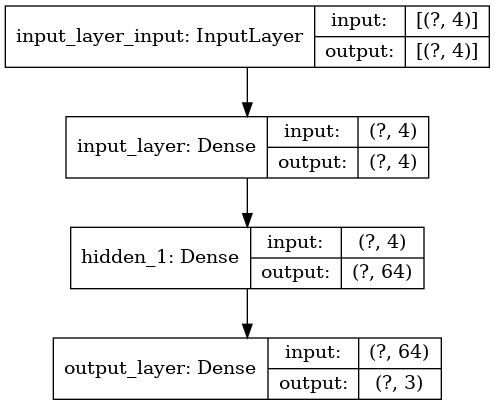

In [8]:
input_dim = len(input_columns)
output_clases = 3 
print ("input_dim : ", input_dim, ", output classes : ", output_clases)

model = tf.keras.Sequential([
            tf.keras.layers.Dense(units=input_dim, activation=tf.nn.relu, input_dim=input_dim, name="input_layer"),
            tf.keras.layers.Dense(units=64, activation=tf.nn.relu, name="hidden_1"),
            tf.keras.layers.Dense(units=output_clases,  activation=tf.nn.softmax, name="output_layer")
            ])

# loss = 'sparse_categorical_crossentropy'  or 'categorical_crossentropy'
model.compile(loss='sparse_categorical_crossentropy', 
                 optimizer=tf.keras.optimizers.Adam(), # or 'adam', 
                 metrics=['accuracy'])

print (model.summary())

tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

## Step 5 : Tensorboard

In [9]:
## This is fairly boiler plate code

import datetime
import os

app_name = 'classification-iris-1' # you can change this, if you like

tb_top_level_dir= '/tmp/tensorboard-logs'
tensorboard_logs_dir= os.path.join (tb_top_level_dir, app_name, 
                                    datetime.datetime.now().strftime("%Y-%m-%d--%H-%M-%S"))
print ("Saving TB logs to : " , tensorboard_logs_dir)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=tensorboard_logs_dir, histogram_freq=1)


Saving TB logs to :  /tmp/tensorboard-logs/classification-iris-1/2019-12-11--05-15-43


## Step 6 : Train

In [10]:
%%time

## TODO configure some of these
epochs = 100  ## experiment 100, 500, 1000

print ("training starting ...")
history = model.fit(
              x_train, y_train,
              epochs=epochs, validation_split = 0.2, verbose=1,
              callbacks=[tensorboard_callback])

print ("training done.")

training starting ...
Train on 96 samples, validate on 24 samples
Epoch 1/100
96/96 [==============================] - 1s 7ms/sample - loss: 1.9878 - accuracy: 0.2708 - val_loss: 1.5423 - val_accuracy: 0.4583
Epoch 2/100
96/96 [==============================] - 0s 425us/sample - loss: 1.8558 - accuracy: 0.1979 - val_loss: 1.4737 - val_accuracy: 0.0833
Epoch 3/100
96/96 [==============================] - 0s 478us/sample - loss: 1.7287 - accuracy: 0.1667 - val_loss: 1.4113 - val_accuracy: 0.2917
Epoch 4/100
96/96 [==============================] - 0s 457us/sample - loss: 1.6136 - accuracy: 0.3750 - val_loss: 1.3477 - val_accuracy: 0.2917
Epoch 5/100
96/96 [==============================] - 0s 686us/sample - loss: 1.5159 - accuracy: 0.3854 - val_loss: 1.2843 - val_accuracy: 0.2917
Epoch 6/100
96/96 [==============================] - 0s 677us/sample - loss: 1.4145 - accuracy: 0.3854 - val_loss: 1.2279 - val_accuracy: 0.2917
Epoch 7/100
96/96 [==============================] - 0s 575us/samp

## Step 7 : Plot History

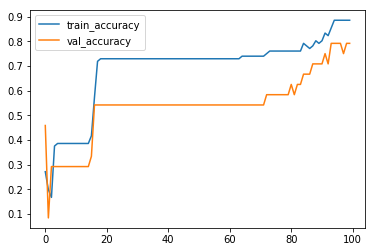

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

## Step 8 : Predict

In [12]:
predictions = model.predict(x_test)
predictions

array([[0.00872822, 0.28618708, 0.70508474],
       [0.05260084, 0.45437852, 0.49302056],
       [0.96561617, 0.03145548, 0.00292829],
       [0.0017961 , 0.16059147, 0.83761245],
       [0.927714  , 0.06369113, 0.00859489],
       [0.00279493, 0.19739261, 0.7998125 ],
       [0.9459213 , 0.04831044, 0.00576828],
       [0.04001892, 0.47468475, 0.48529634],
       [0.027668  , 0.41833365, 0.55399835],
       [0.08670377, 0.5267949 , 0.38650134],
       [0.00339543, 0.1805184 , 0.8160862 ],
       [0.05391069, 0.5078466 , 0.43824276],
       [0.02486549, 0.38225305, 0.5928814 ],
       [0.03452291, 0.44323018, 0.522247  ],
       [0.0265229 , 0.39876786, 0.5747093 ],
       [0.9065748 , 0.08090641, 0.01251882],
       [0.03617065, 0.43955988, 0.52426946],
       [0.02798424, 0.37903115, 0.59298456],
       [0.90945125, 0.0785958 , 0.01195299],
       [0.96272534, 0.03397842, 0.00329622],
       [0.0122856 , 0.30977702, 0.67793727],
       [0.03303691, 0.42062962, 0.5463335 ],
       [0.

### Understanding Predictions
In the above output, for each test input, the softmax layer, produces 3 numbers.  
These numbers are probabilities.  If you add them up, you will get 1.0  
We want to choose the output that has the highest probability.  

For example `(0.03086184, 0.33362046, 0.6355177)` means  
- class 1 has prob of 0.03  or 3%
- class 2 has prob of 0.33  or 33%
- class 3 has prob of 0.63  or 63%

So we choose the class with highest probability as prediction : class 3


We can get class predictions directly as follows

In [13]:
## Use 'predict_classes' instead of 'predict'
y_pred = model.predict_classes(x_test)
y_pred

array([2, 2, 0, 2, 0, 2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 0])

## Step 9 : Evaluate the model

### 9.1 - Print out metrics

In [14]:
metric_names = model.metrics_names
print ("model metrics : " , metric_names)

metrics = model.evaluate(x_test, y_test, verbose=0)

for idx, metric in enumerate(metric_names):
    print ("Metric : {} = {:,.2f}".format (metric_names[idx], metrics[idx]))

model metrics :  ['loss', 'accuracy']
Metric : loss = 0.44
Metric : accuracy = 0.70


### 9.2 - Confussion Matrix
Since this is a classification problem, confusion matrix is very effective way to evaluate our model

In [15]:
## plain confusion matrix 

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred, labels = [0,1,2])
cm


array([[11,  0,  0],
       [ 0,  4,  9],
       [ 0,  0,  6]])

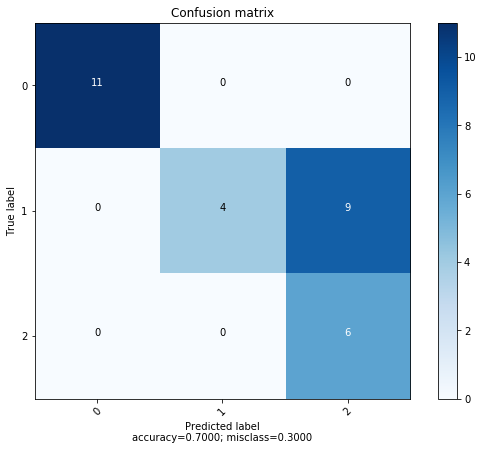

In [16]:
## Plot confusion matrix
import os
import sys
top_dir = os.path.abspath(os.path.join(os.getcwd(), "../"))
if top_dir not in sys.path:
    sys.path.append(top_dir)

import my_utils

my_utils.plot_confusion_matrix(cm, target_names=[0,1,2], normalize=False)

### 9.3 - Metrics calculated from Confusion Matrix

In [17]:
from sklearn.metrics import classification_report
from pprint import pprint

pprint(classification_report(y_test, y_pred, output_dict=True))

{'0': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 11},
 '1': {'f1-score': 0.47058823529411764,
       'precision': 1.0,
       'recall': 0.3076923076923077,
       'support': 13},
 '2': {'f1-score': 0.5714285714285715,
       'precision': 0.4,
       'recall': 1.0,
       'support': 6},
 'accuracy': 0.7,
 'macro avg': {'f1-score': 0.6806722689075632,
               'precision': 0.7999999999999999,
               'recall': 0.7692307692307692,
               'support': 30},
 'weighted avg': {'f1-score': 0.6848739495798319,
                  'precision': 0.88,
                  'recall': 0.7,
                  'support': 30}}


### TODO : Intepret confusion matrix
Instructor will walk you through the matrix.  
Answer these questions
- which class is classified correctly mostly
- which class is classified incorrectly?

## Step 10 : Improve the Model

Inspect the following
- What is the metric 'accuracy' in step 9.1
- And verify this with tensorboard (port 6066)

Most likely, we didn't get a great accuracy.  
How can we improve it?

**Try the following ideas** 

- **Idea-1 : Increase neurons in hidden layer**  
  - In Step-4, increase hidden layer neurons from 8 --> 64  
  - Click 'Kernel --> Restart and Run all Cells'  
  - Hopefully you should see improvement in the accuracy.  
  - Check  accuracy metrics / confusion matrix / tensorboard

## Step 11 : Create a compact version of this notebook
Start another notebook and implement this notebook in the most compact way!